<a href="https://colab.research.google.com/github/AshuPraja13/Data-Science/blob/main/Dog_vs_Cat_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifcation of dog and cat using dataset-
https://www.kaggle.com/datasets/salader/dogs-vs-cats/code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [ ]:
import kaggle

In [ ]:
!mv kaggle.json /root/.kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:37<00:00, 19.0MB/s]
100% 812M/812M [00:37<00:00, 22.7MB/s]


In [ ]:
!unzip -q dogs-vs-cats.zip

In [ ]:
!unzip -q train.zip

In [ ]:
!rm sampleSubmission.csv test1.zip

In [ ]:
len(os.listdir('train'))

25000

In [ ]:
df = pd.DataFrame(os.listdir('train'), columns=["images"])

In [ ]:
df['lables'] = df.images.str.split(".",expand=True)[0]

In [ ]:
df.sample(5)

,images,lables
810,cat.11028.jpg,cat
17174,dog.374.jpg,dog
18405,cat.9281.jpg,cat
6898,dog.2337.jpg,dog
24923,cat.8581.jpg,cat


In [ ]:
! wget https://images.unsplash.com/photo-1611003228941-98852ba62227?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8YmFieSUyMGRvZ3xlbnwwfHwwfHx8MA%3D%3D&w=1000&q=80

--2023-06-27 19:03:42--  https://images.unsplash.com/photo-1611003228941-98852ba62227?ixlib=rb-4.0.3
Resolving images.unsplash.com (images.unsplash.com)... 199.232.46.208, 2a04:4e42:48::720
Connecting to images.unsplash.com (images.unsplash.com)|199.232.46.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4877396 (4.7M) [image/jpeg]
Saving to: ‘photo-1611003228941-98852ba62227?ixlib=rb-4.0.3’

photo-1611003228941 100%[===================>]   4.65M  --.-KB/s    in 0.04s   

2023-06-27 19:03:43 (126 MB/s) - ‘photo-1611003228941-98852ba62227?ixlib=rb-4.0.3’ saved [4877396/4877396]



In [ ]:
dog_org = tf.keras.preprocessing.image.load_img('dog.jpg')

In [ ]:
dog_arr = tf.keras.preprocessing.image.img_to_array(dog_org)

In [ ]:
dog_arr.shape

(2973, 3964, 3)

In [ ]:
dog_preprocess = tf.keras.applications.vgg16.preprocess_input(dog_arr)

In [ ]:
dog_preprocess.shape

Text(0.5, 1.0, 'Preprocessed using VGG16')

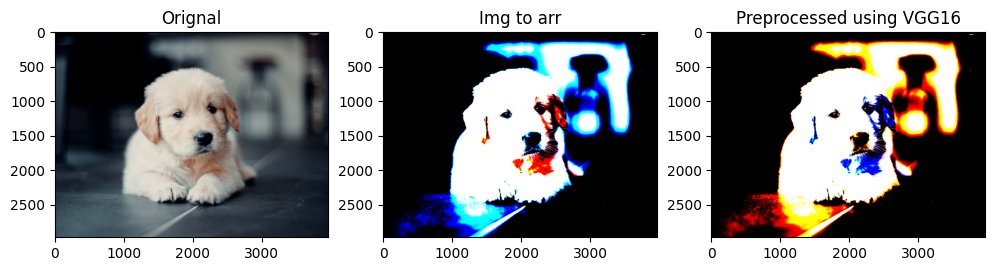

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.imshow(dog_org)
plt.title('Orignal')
plt.subplot(132)
plt.imshow(dog_arr)
plt.title('Img to arr')
plt.subplot(133)
plt.imshow(dog_preprocess)
plt.title('Preprocessed using VGG16')

In [ ]:
cv2.imread('dog.jpg')

array([[[ 6,  1,  0],
        [ 6,  1,  0],
        [ 6,  1,  0],
        ...,
        [17, 10,  7],
        [17, 10,  7],
        [17, 10,  7]],

       [[ 6,  1,  0],
        [ 6,  1,  0],
        [ 5,  1,  0],
        ...,
        [18, 11,  8],
        [18, 11,  8],
        [17, 10,  7]],

       [[ 6,  1,  0],
        [ 6,  1,  0],
        [ 6,  2,  1],
        ...,
        [18, 11,  8],
        [18, 11,  8],
        [16,  9,  6]],

       ...,

       [[91, 80, 60],
        [96, 85, 65],
        [93, 84, 64],
        ...,
        [29, 18, 10],
        [27, 16,  8],
        [25, 14,  6]],

       [[95, 84, 64],
        [94, 83, 63],
        [90, 81, 61],
        ...,
        [30, 19, 11],
        [31, 20, 12],
        [29, 18, 10]],

       [[93, 82, 62],
        [94, 83, 63],
        [92, 83, 63],
        ...,
        [31, 20, 12],
        [31, 20, 12],
        [29, 18, 10]]], dtype=uint8)

In [ ]:
dog_arr

array([[[-123.68    , -115.779   ,  -97.939   ],
        [-123.68    , -115.779   ,  -97.939   ],
        [-123.68    , -115.779   ,  -97.939   ],
        ...,
        [-116.68    , -106.779   ,  -86.939   ],
        [-116.68    , -106.779   ,  -86.939   ],
        [-116.68    , -106.779   ,  -86.939   ]],

       [[-123.68    , -115.779   ,  -97.939   ],
        [-123.68    , -115.779   ,  -97.939   ],
        [-123.68    , -115.779   ,  -98.939   ],
        ...,
        [-115.68    , -105.779   ,  -85.939   ],
        [-115.68    , -105.779   ,  -85.939   ],
        [-116.68    , -106.779   ,  -86.939   ]],

       [[-123.68    , -115.779   ,  -97.939   ],
        [-123.68    , -115.779   ,  -97.939   ],
        [-122.68    , -114.779   ,  -97.939   ],
        ...,
        [-115.68    , -105.779   ,  -85.939   ],
        [-115.68    , -105.779   ,  -85.939   ],
        [-117.68    , -107.779   ,  -87.939   ]],

       ...,

       [[ -63.68    ,  -36.779   ,  -12.939003],
        [ -

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                                      validation_split=0.1)

In [ ]:
batch_size = 16

In [ ]:
train_idg = idg.flow_from_dataframe(dataframe=df,directory = 'train/', x_col= 'images',y_col='lables',
                        target_size=(300,300), batch_size=  batch_size,
                        subset = 'training',)

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_dataframe(dataframe=df,directory = 'train/', x_col= 'images',y_col='lables',
                        target_size=(300,300), batch_size=  batch_size,
                        subset = 'validation',)

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
vgg  = tf.keras.applications.vgg16.VGG16(include_top=False,input_shape=(300,300,3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
for i in vgg.layers:
  i.trainable = False
  print(i.name,i.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg.layers[4].trainable

False

In [ ]:
vgg.input

<KerasTensor: shape=(None, 300, 300, 3) dtype=float32 (created by layer 'input_1')>

Functional Model

In [ ]:
del model

In [ ]:
flat = tf.keras.layers.Flatten(name= 'Flat') (vgg.output)
hidden1 = tf.keras.layers.Dense(128,activation = 'relu',name='Hidden1') (flat)
output =tf.keras.layers.Dense(2,activation = 'softmax', name = 'output') (hidden1)

In [ ]:
model  =tf.keras.models.Model(inputs= vgg.input, outputs = output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

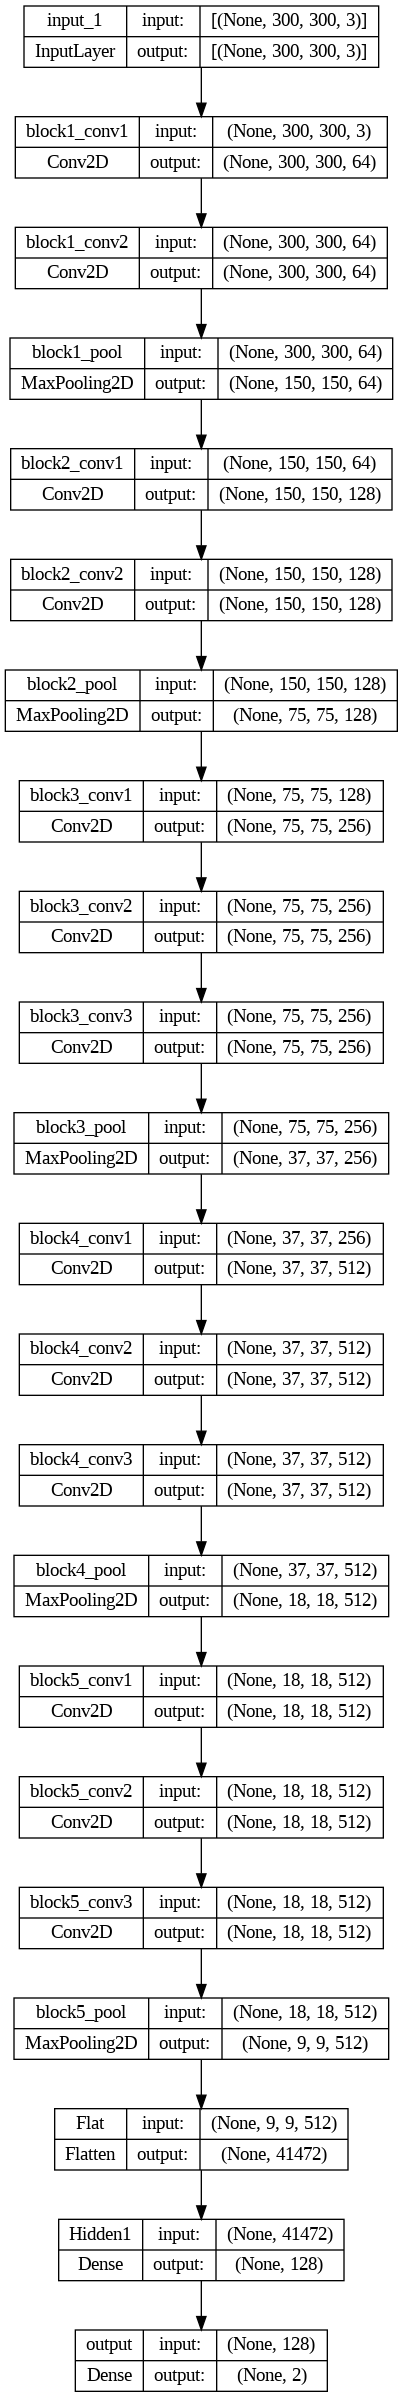

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=['acc'])

In [ ]:
model.fit(x= train_idg, batch_size= batch_size, epochs = 3, validation_data = val_idg)

Epoch 1/3
1407/1407 [==============================] - 221s 156ms/step - loss: 10.9627 - acc: 0.9249 - val_loss: 0.2317 - val_acc: 0.9540
Epoch 2/3
1407/1407 [==============================] - 214s 152ms/step - loss: 0.3145 - acc: 0.9369 - val_loss: 0.1186 - val_acc: 0.9336
Epoch 3/3
1407/1407 [==============================] - 213s 151ms/step - loss: 0.1491 - acc: 0.9682 - val_loss: 0.1636 - val_acc: 0.9848


<ipython-input-63-3c4ed8f4715e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


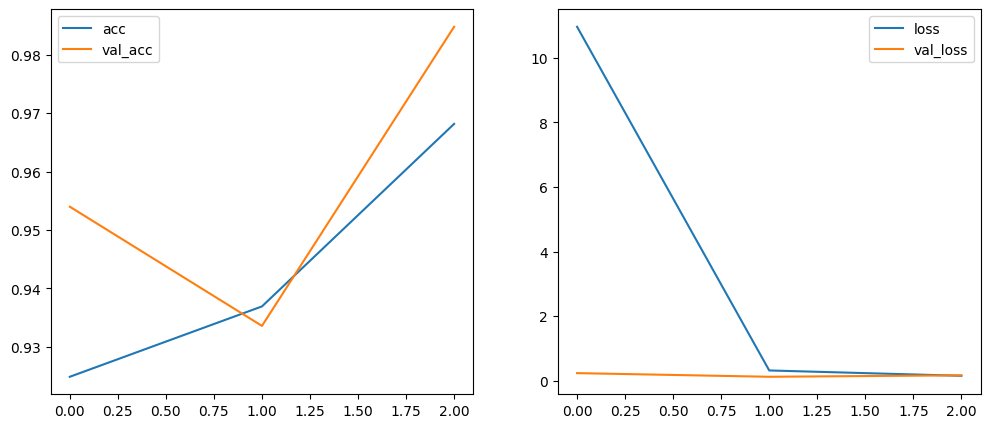

In [ ]:
plt.figure(figsize=(12,5))
plt.title('epochs = 10')
plt.subplot(121)
plt.plot(model.history.history['acc'],label = 'acc')
plt.plot(model.history.history['val_acc'],label = 'val_acc')
plt.legend()
plt.subplot(122)
plt.plot(model.history.history['loss'],label = 'loss')
plt.plot(model.history.history['val_loss'],label = 'val_loss')
plt.legend()

Epochs = 10

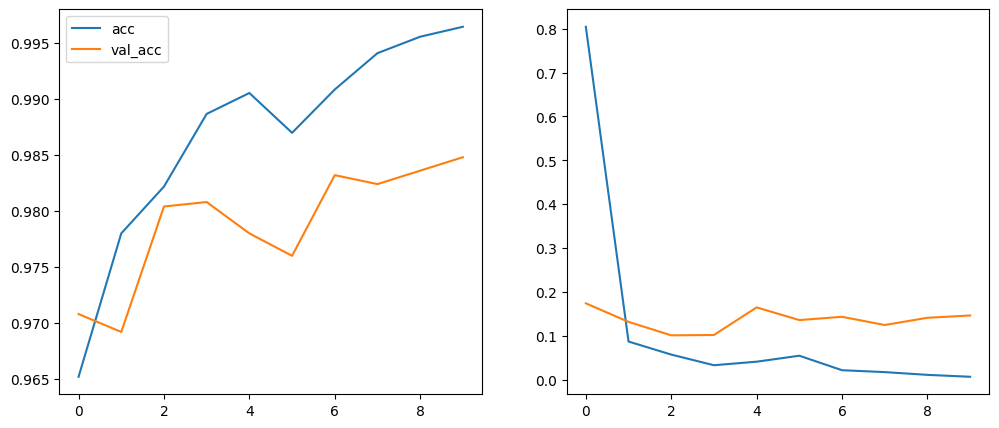

In [ ]:
def pred(img):
  img_org = cv2.imread(img)
  img_test = cv2.resize(img_org, (300,300))
  img_test = np.expand_dims(img_test, axis = 0)
  return model.predict(img_test)

In [ ]:
! wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPvfnvX5LQkPHGaS4LvKQhZjMsaZl4JsowgA&usqp=CAU

--2023-06-27 20:21:18--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPvfnvX5LQkPHGaS4LvKQhZjMsaZl4JsowgA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.194.102, 172.217.194.138, 172.217.194.100, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7170 (7.0K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcQPvfnvX5LQkPHGaS4LvKQhZjMsaZl4JsowgA’

images?q=tbn:ANd9Gc 100%[===================>]   7.00K  --.-KB/s    in 0s      

2023-06-27 20:21:18 (96.1 MB/s) - ‘images?q=tbn:ANd9GcQPvfnvX5LQkPHGaS4LvKQhZjMsaZl4JsowgA’ saved [7170/7170]



In [ ]:
pred('images?q=tbn:ANd9GcQPvfnvX5LQkPHGaS4LvKQhZjMsaZl4JsowgA')

1/1 [==============================] - 0s 31ms/step


array([[0.28141642, 0.7185836 ]], dtype=float32)

In [ ]:
# I've trired dog vs cat data with epoch =3, batch size =16.
# Result - loss: 0.1491 - acc: 0.9682 - val_loss: 0.1636 - val_acc: 0.9848

# When tested with open source images it is observed that:
# 1. For single dog or cat, model predicts almost 100% accurate.
# 2. For images of multiple dogs in single frame or multiple cats in single frame,
#  model gets confused and prediction probability reduces to approx 70%.